Nama: Fernaldy Ferdinand

NIM: 2602068605

Link Video: https://binusianorg-my.sharepoint.com/personal/fernaldy_ferdinand_binus_ac_id/_layouts/15/guestaccess.aspx?share=Ehfll6SHUSFMh_qrjFnFBqYBWZegsbExpeJy6z6KxyTG0Q&e=NM5lfA

In [99]:
# Import libraries
import pandas as pd
import numpy as np
import time
import requests
from bs4 import BeautifulSoup

In [100]:
def scrap_kompas():
    url = "https://indeks.kompas.com/?source=navbar&site=bola&page={}"
    artikel = []
    seen_titles = set()  # Gunakan set untuk menyimpan judul yang sudah diambil
    for page in range(1, 7):  # Loop untuk halaman 1 sampai 6
        print(f"Fetching page {page}: {url.format(page)}")
        response = requests.get(url.format(page))
        if response.status_code != 200:
            print(f"Failed to fetch page {page}: {response.status_code}")
            continue
        soup = BeautifulSoup(response.text, "html.parser")
        # Cari elemen <figcaption> yang berisi artikel
        for article in soup.find_all("div", class_ = "articleItem"):
            title = article.find("h2").get_text(strip=True) if article.find("h2") else None
            link = article.find("a")["href"] if article.find("a") else None
            
            # Pastikan artikel belum pernah diambil sebelumnya
            if title and link and title not in seen_titles:
                artikel.append({"text": title, "Media": "kompas.com", "Link": link})
                seen_titles.add(title)  # Tambahkan judul ke set
                
                if len(artikel) >= 50:  # Batasi hanya 50 artikel
                    print("Collected 50 articles. Stopping...")
                    return artikel
        # Tambahkan jeda untuk menghindari blokir server
        time.sleep(1)
    return artikel

In [101]:
def scrap_detik_sport():
    url = "https://sport.detik.com/sepakbola/indeks?page={}"
    artikel = []
    seen_titles = set()  # Gunakan set untuk menyimpan judul yang sudah diambil
    for page in range(1, 7):  # Loop untuk halaman 1 sampai 6
        print(f"Fetching page {page}: {url.format(page)}")
        response = requests.get(url.format(page))
        if response.status_code != 200:
            print(f"Failed to fetch page {page}: {response.status_code}")
            continue
        soup = BeautifulSoup(response.text, "html.parser")
        # Cari elemen <figcaption> yang berisi artikel
        for article in soup.find_all("div", class_ = "media__text"):
            title = article.find("h3").get_text(strip=True) if article.find("h3") else None
            link = article.find("a")["href"] if article.find("a") else None
            
            # Pastikan artikel belum pernah diambil sebelumnya
            if title and link and title not in seen_titles:
                artikel.append({"text": title, "Media": "kompas.com", "Link": link})
                seen_titles.add(title)  # Tambahkan judul ke set
                
                if len(artikel) >= 50:  # Batasi hanya 50 artikel
                    print("Collected 50 articles. Stopping...")
                    return artikel
        # Tambahkan jeda untuk menghindari blokir server
        time.sleep(1)
    return artikel

Fungsi diatas digunakan untuk mengumpulkan artikel dari halaman web, khususnya yang terkait dengan olahraga, dengan mengambil artikel dari halaman 1 hingga 6. Setiap artikel yang berhasil diambil memiliki judul dan link yang disimpan dalam list artikel, dengan pengecekan untuk memastikan artikel yang sama tidak diambil lebih dari sekali menggunakan set seen_titles. Fungsi ini membatasi pengambilan hingga 50 artikel dan menambahkan jeda 1 detik antara permintaan untuk menghindari pemblokiran server. Setelah mencapai batas artikel yang ditentukan, fungsi mengembalikan list artikel yang terkumpul.

In [102]:
def labeled(row):
    text = row["text"].lower()
    if any(keyword in text for keyword in ["man united", "mu", "chelsea", "liga inggris", "premier league", "manchester united", "manchester city", "liverpool"]):
        return "Liga Inggris"
    elif any(keyword in text for keyword in ["liga 1","liga 2", "timnas", "persib", "indonesia"]):
        return "Liga Indonesia"
    elif any(keyword in text for keyword in ["copa del rey", "la liga", "barcelona", "real madrid", "liga spanyol"]):
        return "Liga Spanyol"
    elif any(keyword in text for keyword in ["serie a", "ac milan", "juventus", "inter milan", "liga italia"]):
        return "Liga Italia"
    else:
        return "Olahraga Non Sepak Bola" 

Fungsi digunakan untuk memberi label pada artikel berdasarkan kata kunci yang ada dalam teks. Fungsi ini pertama-tama mengubah teks menjadi huruf kecil untuk pencocokan yang tidak peka huruf besar/kecil. Kemudian, ia memeriksa apakah teks mengandung kata kunci tertentu yang terkait dengan liga sepak bola tertentu, seperti "Liga Inggris", "Liga Indonesia", "Liga Spanyol", dan "Liga Italia". Jika kata kunci ditemukan, artikel diberi label sesuai dengan liga tersebut. Jika tidak ada kecocokan, artikel diberi label "Olahraga Non Sepak Bola" sebagai label default.

In [103]:
kompas = scrap_kompas()

Fetching page 1: https://indeks.kompas.com/?source=navbar&site=bola&page=1
Fetching page 2: https://indeks.kompas.com/?source=navbar&site=bola&page=2
Fetching page 3: https://indeks.kompas.com/?source=navbar&site=bola&page=3
Fetching page 4: https://indeks.kompas.com/?source=navbar&site=bola&page=4
Collected 50 articles. Stopping...


In [104]:
df_kompas = pd.DataFrame(kompas)
df_kompas.to_csv("kompas_articles.csv", index=False)

In [105]:
df_kompas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50 non-null     object
 1   Media   50 non-null     object
 2   Link    50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [106]:
df_kompas["Label"] = df_kompas.apply(labeled, axis=1)

In [107]:
df_kompas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50 non-null     object
 1   Media   50 non-null     object
 2   Link    50 non-null     object
 3   Label   50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [108]:
df_kompas['Label'].value_counts()

Liga Indonesia             25
Olahraga Non Sepak Bola    11
Liga Inggris               10
Liga Italia                 3
Liga Spanyol                1
Name: Label, dtype: int64

In [109]:
detik_sport = scrap_detik_sport()

Fetching page 1: https://sport.detik.com/sepakbola/indeks?page=1
Fetching page 2: https://sport.detik.com/sepakbola/indeks?page=2
Fetching page 3: https://sport.detik.com/sepakbola/indeks?page=3
Collected 50 articles. Stopping...


In [110]:
df_detik = pd.DataFrame(detik_sport)
df_detik.to_csv("detik_sport_articles.csv", index=False)

In [111]:
df_detik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50 non-null     object
 1   Media   50 non-null     object
 2   Link    50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [112]:
df_detik["Label"] = df_detik.apply(labeled, axis=1)

In [113]:
df_detik["Label"].value_counts()

Liga Inggris               20
Olahraga Non Sepak Bola    16
Liga Indonesia             10
Liga Italia                 3
Liga Spanyol                1
Name: Label, dtype: int64

Penggabungan 2 data artikel berbeda

In [114]:
artikel = kompas + detik_sport
df = pd.DataFrame(artikel)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    100 non-null    object
 1   Media   100 non-null    object
 2   Link    100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [115]:
df.head()

,text,Media,Link
0,"Arema FC Kalah Lagi, Arkhan Fikri Ungkap Fakto...",kompas.com,https://bola.kompas.com/read/2025/01/24/234728...
1,Klasemen Sementara Liga 1: Persib Jauh di Depa...,kompas.com,https://bola.kompas.com/read/2025/01/24/234339...
2,Alasan Jens Raven Absen dari laga Timnas U20 I...,kompas.com,https://bola.kompas.com/read/2025/01/24/231232...
3,Peluang Baru Atlet Bisbol Indonesia Berprestas...,kompas.com,https://www.kompas.com/sports/read/2025/01/24/...
4,"Cetak Brace di Persib Vs Arema, Tyronne Del Pi...",kompas.com,https://bola.kompas.com/read/2025/01/24/225847...


In [116]:
df['Label'] = df.apply(labeled, axis= 1)

In [117]:
df.head()

,text,Media,Link,Label
0,"Arema FC Kalah Lagi, Arkhan Fikri Ungkap Fakto...",kompas.com,https://bola.kompas.com/read/2025/01/24/234728...,Olahraga Non Sepak Bola
1,Klasemen Sementara Liga 1: Persib Jauh di Depa...,kompas.com,https://bola.kompas.com/read/2025/01/24/234339...,Liga Indonesia
2,Alasan Jens Raven Absen dari laga Timnas U20 I...,kompas.com,https://bola.kompas.com/read/2025/01/24/231232...,Liga Indonesia
3,Peluang Baru Atlet Bisbol Indonesia Berprestas...,kompas.com,https://www.kompas.com/sports/read/2025/01/24/...,Liga Indonesia
4,"Cetak Brace di Persib Vs Arema, Tyronne Del Pi...",kompas.com,https://bola.kompas.com/read/2025/01/24/225847...,Liga Indonesia


Menyimpan data kebentuk csv

In [118]:
df.to_csv("artikel_sepak_bola.csv", index=False)

In [119]:
df['Label'].value_counts()

Liga Indonesia             35
Liga Inggris               30
Olahraga Non Sepak Bola    27
Liga Italia                 6
Liga Spanyol                2
Name: Label, dtype: int64

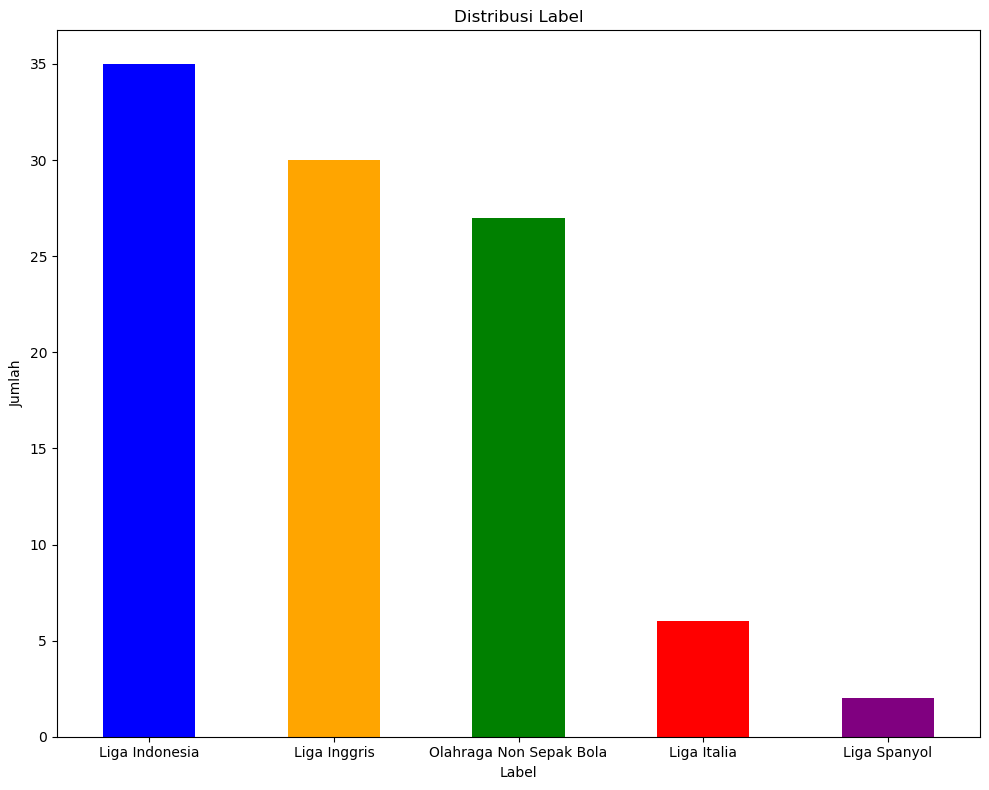

In [120]:
import matplotlib.pyplot as plt
label_counts = df['Label'].value_counts()

# Plot
plt.figure(figsize=(10, 8))
label_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [121]:
df.isna().sum()

text     0
Media    0
Link     0
Label    0
dtype: int64

In [122]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [123]:
def preprocess_text(text):
    #Cleaning
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    
    #Tokenize
    token = word_tokenize(text)
    
    #Stopword / Filtering
    stop_word = set(stopwords.words('indonesian'))
    token = [Word for Word in token if Word not in stop_word]
    
    # Stemming and Lemmatize
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [lemmatizer.lemmatize(word) for word in token]

    return ' '.join(stemmed_tokens)

Membuat fungsi untuk memproses teks dengan beberapa tahapan pembersihan dan pemrosesan bahasa alami. Pertama, teks dibersihkan dengan menghapus karakter non-huruf, tanda baca, dan angka, serta mengubah teks menjadi huruf kecil. Kemudian, teks di-tokenisasi menggunakan word_tokenize untuk memecah teks menjadi kata-kata. Selanjutnya, stopword dalam bahasa Indonesia dihapus dengan memfilter kata-kata yang ada dalam daftar stopwords. Terakhir, setiap kata yang tersisa dikenakan lemmatization menggunakan WordNetLemmatizer untuk mendapatkan bentuk dasar kata. Hasil akhirnya adalah teks yang sudah diproses dan digabungkan kembali menjadi satu string.

In [124]:
df["Cleaned"] = df["text"].apply(preprocess_text)

In [125]:
df.head()

,text,Media,Link,Label,Cleaned
0,"Arema FC Kalah Lagi, Arkhan Fikri Ungkap Fakto...",kompas.com,https://bola.kompas.com/read/2025/01/24/234728...,Olahraga Non Sepak Bola,arema fc kalah arkhan fikri faktor kekurangan ...
1,Klasemen Sementara Liga 1: Persib Jauh di Depa...,kompas.com,https://bola.kompas.com/read/2025/01/24/234339...,Liga Indonesia,klasemen liga persib madura united terpuruk
2,Alasan Jens Raven Absen dari laga Timnas U20 I...,kompas.com,https://bola.kompas.com/read/2025/01/24/231232...,Liga Indonesia,alasan jens raven absen laga timnas u indonesi...
3,Peluang Baru Atlet Bisbol Indonesia Berprestas...,kompas.com,https://www.kompas.com/sports/read/2025/01/24/...,Liga Indonesia,peluang atlet bisbol indonesia berprestasi kan...
4,"Cetak Brace di Persib Vs Arema, Tyronne Del Pi...",kompas.com,https://bola.kompas.com/read/2025/01/24/225847...,Liga Indonesia,cetak brace persib v arema tyronne del pino la...


In [126]:
df = df[["Cleaned", "Label"]]

In [127]:
df.head()

,Cleaned,Label
0,arema fc kalah arkhan fikri faktor kekurangan ...,Olahraga Non Sepak Bola
1,klasemen liga persib madura united terpuruk,Liga Indonesia
2,alasan jens raven absen laga timnas u indonesi...,Liga Indonesia
3,peluang atlet bisbol indonesia berprestasi kan...,Liga Indonesia
4,cetak brace persib v arema tyronne del pino la...,Liga Indonesia


In [128]:
%pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

In [130]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['Cleaned'], df['Label'], test_size=0.2,stratify=df['Label'],random_state=42)

Melakukan split data pada kolom 'Cleaned' dan 'Label' dengan parameter stratify=df['Label'] yg memastikan distribusi label yang seimbang di antara data pelatihan dan pengujian. 

In [131]:
# Load Pretrained Model and Tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

loading configuration file config.json from cache at C:\Users\Fernaldy/.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f734a8a67f723594\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Fernaldy/.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f734a8a67f723594\v

menyimpan model BERT yang telah dilatih sebelumnya (bert-base-uncased) beserta tokenizer-nya menggunakan fungsi AutoTokenizer.from_pretrained, yang memungkinkan teks diproses dan dipersiapkan untuk pemodelan lebih lanjut.

In [132]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.


Stage 1

In [133]:
# Tokenize data
def tokenize_and_encode(texts, labels, tokenizer, max_length=128):
    try:
        texts = [str(text) for text in texts]
    except Exception as e:
        raise ValueError(f"Error converting texts to strings: {e}")
    tokenized_data = tokenizer(
        texts,
        truncation=True,
        padding="max_length",
        max_length=max_length,
        return_tensors="pt" 
    )
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels_tensor = torch.tensor(labels, dtype=torch.long)
    return tokenized_data, labels_tensor

Fungi untuk mempersiapkan teks dan label agar dapat diproses oleh model BERT. Teks pertama-tama diubah menjadi string, kemudian di-tokenisasi menggunakan tokenizer BERT dengan padding dan pemotongan panjang teks sesuai max_length. Label kemudian diubah menjadi nilai numerik menggunakan LabelEncoder, dan hasilnya dikonversi menjadi tensor PyTorch. Fungsi ini mengembalikan data yang telah di-tokenisasi dan label dalam bentuk tensor siap pakai untuk pelatihan model.

In [173]:
class TextClassificationDataset(Dataset):
    def __init__(self, tokenized_inputs, target_labels):
        self.tokenized_inputs = tokenized_inputs
        self.target_labels = target_labels

    def __getitem__(self, index: int) -> dict:
        data_point = {key: value[index] for key, value in self.tokenized_inputs.items()}
        data_point["labels"] = self.target_labels[index]
        return data_point

    def __len__(self) -> int:
        return len(self.target_labels)  
    
    @property
    def column_names(self):
        return list(self.tokenized_inputs.keys())

    @property
    def features(self):
        return self.column_names

Class diatas merupakan subclass dari Dataset yang dirancang untuk tugas klasifikasi teks dengan PyTorch. Dalam konstruktor (__init__), data yang telah di-tokenisasi (tokenized_inputs) dan label target (target_labels) disimpan. Fungsi __getitem__ mengembalikan data pada indeks tertentu dalam bentuk dictionary yang berisi token dan label. Fungsi __len__ mengembalikan jumlah total data berdasarkan panjang label. Selain itu, ada dua properti: column_names, yang mengembalikan nama kolom dari input yang telah di-tokenisasi, dan features, yang mengembalikan nama-nama fitur tersebut. Class ini mempermudah pengolahan data untuk pelatihan model klasifikasi teks.

In [167]:
# Define evaluation metrics
def compute_metrics(pred):
    logits, labels = pred
    preds = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average="weighted")
    recall = recall_score(labels, preds, average="weighted")
    f1 = f1_score(labels, preds, average="weighted")
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

fungsi ini digunakan untuk menghitung berbagai metrik evaluasi untuk model klasifikasi. Fungsi ini menerima prediksi (pred) yang terdiri dari logits dan label. Logits diubah menjadi prediksi kelas dengan menggunakan np.argmax. Kemudian, metrik evaluasi dihitung menggunakan fungsi dari sklearn.metrics, termasuk akurasi, presisi, recall, dan skor F1 dengan pendekatan rata-rata tertimbang (weighted). Metrik yang dihitung dikembalikan dalam bentuk dictionary. Fungsi ini berguna untuk mengevaluasi kinerja model klasifikasi.

In [174]:
train_tokens, train_labels_encoded = tokenize_and_encode(train_texts, train_labels, tokenizer)
test_tokens, test_labels_encoded = tokenize_and_encode(test_texts, test_labels, tokenizer)

train_dataset = TextClassificationDataset(train_tokens, train_labels_encoded)
test_dataset = TextClassificationDataset(test_tokens, test_labels_encoded)

Code ini men-tokenisasi teks pelatihan dan pengujian serta mengonversi label menjadi format numerik menggunakan fungsi tokenize_and_encode. Hasilnya kemudian dibungkus dalam objek TextClassificationDataset untuk mempersiapkan dataset pelatihan dan pengujian yang siap digunakan dalam pelatihan model klasifikasi teks.

In [175]:
# One-Stage Model
model_1_stage = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

loading configuration file config.json from cache at C:\Users\Fernaldy/.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f734a8a67f723594\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.

In [176]:
training_args = TrainingArguments(
    output_dir="./results_1stage",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs_1stage",
    logging_steps=10,
    load_best_model_at_end=True,
    no_cuda=True,  # Force CPU usage
)


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [177]:
traine_stage_1 = Trainer(
    model=model_1_stage,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

Code ini mengonfigurasi dan memulai pelatihan model dengan TrainingArguments untuk menetapkan parameter pelatihan seperti batch size, epoch, dan laju pembelajaran. Kemudian, Trainer digunakan untuk melatih model dengan dataset pelatihan dan pengujian serta metrik evaluasi yang telah ditentukan.

In [178]:
print("====== Fine-Tuning One-Stage Model (5 classes) ======")
traine_stage_1.train()

c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\transformers\optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 80
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 15
  Number of trainable parameters = 109486085


====== Fine-Tuning One-Stage Model (5 classes) ======


 33%|███▎      | 5/15 [00:25<00:48,  4.82s/it]***** Running Evaluation *****
  Num examples = 20
  Batch size = 16


c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                              
                                   
 33%|███▎      | 5/15 [00:27<00:48,  4.82s/it]
Saving model checkpoint to ./results_1stage\checkpoint-5
Configuration saved in ./results_1stage\checkpoint-5\config.json


{'eval_loss': 1.4844105243682861, 'eval_accuracy': 0.4, 'eval_precision': 0.28125, 'eval_recall': 0.4, 'eval_f1': 0.3026086956521739, 'eval_runtime': 1.8785, 'eval_samples_per_second': 10.647, 'eval_steps_per_second': 1.065, 'epoch': 1.0}


Model weights saved in ./results_1stage\checkpoint-5\pytorch_model.bin
                                               
 67%|██████▋   | 10/15 [00:51<00:24,  4.82s/it]***** Running Evaluation *****
  Num examples = 20
  Batch size = 16


{'loss': 1.4941, 'learning_rate': 6.666666666666667e-06, 'epoch': 2.0}




c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                               
                                     
 67%|██████▋   | 10/15 [00:53<00:24,  4.82s/it]
Saving model checkpoint to ./results_1stage\checkpoint-10
Configuration saved in ./results_1stage\checkpoint-10\config.json


{'eval_loss': 1.4522838592529297, 'eval_accuracy': 0.4, 'eval_precision': 0.24411764705882355, 'eval_recall': 0.4, 'eval_f1': 0.27083333333333337, 'eval_runtime': 1.9276, 'eval_samples_per_second': 10.376, 'eval_steps_per_second': 1.038, 'epoch': 2.0}


Model weights saved in ./results_1stage\checkpoint-10\pytorch_model.bin
100%|██████████| 15/15 [01:19<00:00,  5.20s/it]***** Running Evaluation *****
  Num examples = 20
  Batch size = 16


c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                               
                                     
100%|██████████| 15/15 [01:24<00:00,  5.20s/it]
Saving model checkpoint to ./results_1stage\checkpoint-15
Configuration saved in ./results_1stage\checkpoint-15\config.json


{'eval_loss': 1.4375358819961548, 'eval_accuracy': 0.45, 'eval_precision': 0.303125, 'eval_recall': 0.45, 'eval_f1': 0.3330434782608696, 'eval_runtime': 4.9418, 'eval_samples_per_second': 4.047, 'eval_steps_per_second': 0.405, 'epoch': 3.0}


Model weights saved in ./results_1stage\checkpoint-15\pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results_1stage\checkpoint-15 (score: 1.4375358819961548).
                                               
100%|██████████| 15/15 [01:27<00:00,  5.81s/it]

{'train_runtime': 87.1662, 'train_samples_per_second': 2.753, 'train_steps_per_second': 0.172, 'train_loss': 1.4670384407043457, 'epoch': 3.0}


TrainOutput(global_step=15, training_loss=1.4670384407043457, metrics={'train_runtime': 87.1662, 'train_samples_per_second': 2.753, 'train_steps_per_second': 0.172, 'train_loss': 1.4670384407043457, 'epoch': 3.0})

Code ini menjalankan proses pelatihan model menggunakan objek Trainer yang telah dikonfigurasi sebelumnya. Fungsi train() memulai pelatihan model pada dataset pelatihan dengan parameter yang telah ditentukan dalam TrainingArguments.

In [179]:
print("====== Evaluating One-Stage Model (5 classes) ======")
predictions = traine_stage_1.predict(test_dataset)
logits = torch.tensor(predictions.predictions)
y_pred = torch.argmax(logits, axis=-1)

***** Running Prediction *****
  Num examples = 20
  Batch size = 16


====== Evaluating One-Stage Model (5 classes) ======


100%|██████████| 2/2 [00:00<00:00,  2.79it/s]c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


Code ini menghasilkan prediksi dari model pada dataset pengujian, kemudian mengonversi logits menjadi kelas prediksi dengan torch.argmax.

In [180]:
print("Classification Report (1-stage model):\n")
print(classification_report(test_labels_encoded, y_pred))

Classification Report (1-stage model):

              precision    recall  f1-score   support

           0       0.44      1.00      0.61         7
           1       0.50      0.33      0.40         6
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5

    accuracy                           0.45        20
   macro avg       0.19      0.27      0.20        20
weighted avg       0.30      0.45      0.33        20



c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Stage 2

In [181]:
encode = LabelEncoder()
encode.fit(["Olahraga Non Sepak Bola", "Sepak Bola"])

LabelEncoder()

In [182]:
train_label = train_labels.map(
    lambda x: "Sepak Bola" if x != "Olahraga Non Sepak Bola" else x
)

test_label = test_labels.map(
    lambda x: "Sepak Bola" if x != "Olahraga Non Sepak Bola" else x
)

Code ini memodifikasi label pada dataset pelatihan dan pengujian, mengganti semua label yang bukan "Olahraga Non Sepak Bola" menjadi "Sepak Bola" menggunakan fungsi map.

In [183]:
binary_train_labels_encoded = encode.transform(train_label)
binary_test_labels_encoded = encode.transform(test_label)

In [184]:
# Tokenize data for binary classification
tokens_train_binary, labels_train_binary = tokenize_and_encode(
    train_texts, binary_train_labels_encoded, tokenizer
)
tokens_test_binary, labels_test_binary = tokenize_and_encode(
    test_texts, binary_test_labels_encoded, tokenizer
)

In [185]:
train_dataset_binary = TextClassificationDataset(tokens_train_binary, labels_train_binary)
test_dataset_binary = TextClassificationDataset(tokens_test_binary, labels_test_binary)

Code ini mengonversi label menjadi format biner menggunakan encode.transform, kemudian men-tokenisasi teks untuk klasifikasi biner. Dataset pelatihan dan pengujian untuk klasifikasi biner kemudian dibungkus dalam objek TextClassificationDataset untuk digunakan dalam pelatihan model.

In [186]:
# Initialize binary classification model
model_binary = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2
)

loading configuration file config.json from cache at C:\Users\Fernaldy/.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f734a8a67f723594\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at C:\Users\Fernaldy/.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f7

In [187]:
training_args_binary = TrainingArguments(
    output_dir="./results_binary",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs_binary",
    logging_steps=10,
    load_best_model_at_end=True,
    no_cuda=True
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [188]:
trainer_binary = Trainer(
    model=model_binary,
    args=training_args_binary,
    train_dataset=train_dataset_binary,
    eval_dataset=test_dataset_binary,
    compute_metrics=compute_metrics
)

Code ini mengonfigurasi dan memulai pelatihan model dengan TrainingArguments untuk menetapkan parameter pelatihan seperti batch size, epoch, dan laju pembelajaran. Kemudian, Trainer digunakan untuk melatih model dengan dataset pelatihan dan pengujian serta metrik evaluasi yang telah ditentukan.

In [189]:
# Train and evaluate binary model
print("====== Training Binary Model (Stage 1) ======")
trainer_binary.train()

c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\transformers\optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 80
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 15
  Number of trainable parameters = 109483778


====== Training Binary Model (Stage 1) ======


 33%|███▎      | 5/15 [00:24<00:49,  4.98s/it]***** Running Evaluation *****
  Num examples = 20
  Batch size = 16


c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       
                                              
 33%|███▎      | 5/15 [00:26<00:49,  4.98s/it]
Saving model checkpoint to ./results_binary\checkpoint-5
Configuration saved in ./results_binary\checkpoint-5\config.json


{'eval_loss': 0.6095015406608582, 'eval_accuracy': 0.75, 'eval_precision': 0.5625, 'eval_recall': 0.75, 'eval_f1': 0.6428571428571428, 'eval_runtime': 1.9481, 'eval_samples_per_second': 10.266, 'eval_steps_per_second': 1.027, 'epoch': 1.0}


Model weights saved in ./results_binary\checkpoint-5\pytorch_model.bin
 67%|██████▋   | 10/15 [01:12<00:46,  9.30s/it]***** Running Evaluation *****
  Num examples = 20
  Batch size = 16


{'loss': 0.6589, 'learning_rate': 6.666666666666667e-06, 'epoch': 2.0}




c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       
                                               
 67%|██████▋   | 10/15 [01:16<00:46,  9.30s/it]
Saving model checkpoint to ./results_binary\checkpoint-10
Configuration saved in ./results_binary\checkpoint-10\config.json


{'eval_loss': 0.5664868354797363, 'eval_accuracy': 0.75, 'eval_precision': 0.5625, 'eval_recall': 0.75, 'eval_f1': 0.6428571428571428, 'eval_runtime': 3.6441, 'eval_samples_per_second': 5.488, 'eval_steps_per_second': 0.549, 'epoch': 2.0}


Model weights saved in ./results_binary\checkpoint-10\pytorch_model.bin
100%|██████████| 15/15 [01:43<00:00,  6.05s/it]***** Running Evaluation *****
  Num examples = 20
  Batch size = 16


c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       
                                               
100%|██████████| 15/15 [01:45<00:00,  6.05s/it]
Saving model checkpoint to ./results_binary\checkpoint-15
Configuration saved in ./results_binary\checkpoint-15\config.json


{'eval_loss': 0.5625196695327759, 'eval_accuracy': 0.75, 'eval_precision': 0.5625, 'eval_recall': 0.75, 'eval_f1': 0.6428571428571428, 'eval_runtime': 1.974, 'eval_samples_per_second': 10.132, 'eval_steps_per_second': 1.013, 'epoch': 3.0}


Model weights saved in ./results_binary\checkpoint-15\pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results_binary\checkpoint-15 (score: 0.5625196695327759).

100%|██████████| 15/15 [01:47<00:00,  7.18s/it]

{'train_runtime': 107.6447, 'train_samples_per_second': 2.23, 'train_steps_per_second': 0.139, 'train_loss': 0.6188090960184733, 'epoch': 3.0}


TrainOutput(global_step=15, training_loss=0.6188090960184733, metrics={'train_runtime': 107.6447, 'train_samples_per_second': 2.23, 'train_steps_per_second': 0.139, 'train_loss': 0.6188090960184733, 'epoch': 3.0})

In [190]:
print("====== Evaluating Binary Model (Stage 1) ======")
predictions_binary = trainer_binary.predict(test_dataset_binary)
y_pred_binary = np.argmax(predictions_binary.predictions, axis=-1)

***** Running Prediction *****
  Num examples = 20
  Batch size = 16


====== Evaluating Binary Model (Stage 1) ======


100%|██████████| 2/2 [00:00<00:00,  3.77it/s]c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


In [191]:
print("Classification Report (Binary Model):\n")
print(classification_report(binary_test_labels_encoded, y_pred_binary))

Classification Report (Binary Model):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Kelas Liga

In [192]:
soccer_train_mask = binary_train_labels_encoded == 1
soccer_test_mask = binary_test_labels_encoded == 1

Code ini membuat masker biner (soccer_train_mask dan soccer_test_mask) untuk menandai data yang memiliki label "Sepak Bola" (encoded sebagai 1) pada dataset pelatihan dan pengujian. Masker ini digunakan untuk memilih data dengan label tersebut.

In [193]:
train_texts_stage2 = train_texts[soccer_train_mask]
train_labels_stage2 = train_labels[soccer_train_mask]
test_texts_stage2 = test_texts[soccer_test_mask]
test_labels_stage2 = test_labels[soccer_test_mask]

Code ini memfilter dataset pelatihan dan pengujian untuk hanya menyertakan teks dan label yang terkait dengan "Sepak Bola" (label yang bernilai 1) menggunakan masker yang telah dibuat sebelumnya (soccer_train_mask dan soccer_test_mask).

In [194]:
# Map soccer-related labels to league categories
league_label_encoder = LabelEncoder()
league_label_encoder.fit(["Liga Inggris", "Liga Indonesia", "Liga Spanyol", "Liga Italia"])

train_labels_stage2_encoded = league_label_encoder.transform(train_labels_stage2)
test_labels_stage2_encoded = league_label_encoder.transform(test_labels_stage2)

Code ini mengonversi label terkait sepak bola menjadi kategori liga dengan menggunakan LabelEncoder. Label yang ada pada dataset pelatihan dan pengujian (seperti "Liga Inggris", "Liga Indonesia", dll.) diubah menjadi format numerik yang sesuai untuk klasifikasi lebih lanjut.

In [195]:
# Tokenize data for soccer league classification
tokens_train_2stage, labels_train_2stage = tokenize_and_encode(
    train_texts_stage2, train_labels_stage2_encoded, tokenizer
)
tokens_test_2stage, labels_test_2stage = tokenize_and_encode(
    test_texts_stage2, test_labels_stage2_encoded, tokenizer
)

Code ini men-tokenisasi teks untuk klasifikasi liga sepak bola, mengonversi teks pelatihan dan pengujian menjadi format yang dapat diproses oleh model, dan mengonversi label liga menjadi format numerik yang sesuai menggunakan fungsi tokenize_and_encode.

In [196]:
train_dataset_2stage = TextClassificationDataset(tokens_train_2stage, labels_train_2stage)
test_dataset_2stage = TextClassificationDataset(tokens_test_2stage, labels_test_2stage)

Code ini membuat dataset pelatihan dan pengujian untuk tahap kedua klasifikasi (liga sepak bola) dengan membungkus tokenized data dan label yang telah diproses ke dalam objek TextClassificationDataset.

In [197]:
# Initialize soccer league classification model
model_2stage = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=4
)

loading configuration file config.json from cache at C:\Users\Fernaldy/.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f734a8a67f723594\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cac

In [198]:
training_args_2stage = TrainingArguments(
    output_dir="./results_2stage",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs_2stage",
    logging_steps=10,
    load_best_model_at_end=True,
    no_cuda=True
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [199]:
trainer_2stage = Trainer(
    model=model_2stage,
    args=training_args_2stage,
    train_dataset=train_dataset_2stage,
    eval_dataset=test_dataset_2stage,
    compute_metrics=compute_metrics
)

Code ini mengonfigurasi dan memulai pelatihan model dengan TrainingArguments untuk menetapkan parameter pelatihan seperti batch size, epoch, dan laju pembelajaran. Kemudian, Trainer digunakan untuk melatih model dengan dataset pelatihan dan pengujian serta metrik evaluasi yang telah ditentukan.

In [200]:
# Train and evaluate soccer league classification model
print("====== Training Soccer League Model (Stage 2) ======")
trainer_2stage.train()

c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\transformers\optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 58
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 12
  Number of trainable parameters = 109485316


====== Training Soccer League Model (Stage 2) ======


 33%|███▎      | 4/12 [00:40<01:19,  9.94s/it]***** Running Evaluation *****
  Num examples = 15
  Batch size = 16

c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
                                              
                                     

 33%|███▎      | 4/12 [00:43<01:19,  9.94s/it]

Saving model checkpoint to ./results_2stage\checkpoint-4
Configuration saved in ./results_2stage\checkpoint-4\config.json


{'eval_loss': 1.2386133670806885, 'eval_accuracy': 0.3333333333333333, 'eval_precision': 0.14285714285714285, 'eval_recall': 0.3333333333333333, 'eval_f1': 0.2, 'eval_runtime': 2.2115, 'eval_samples_per_second': 6.783, 'eval_steps_per_second': 0.452, 'epoch': 1.0}


Model weights saved in ./results_2stage\checkpoint-4\pytorch_model.bin
 67%|██████▋   | 8/12 [01:02<00:22,  5.55s/it]***** Running Evaluation *****
  Num examples = 15
  Batch size = 16

c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
                                              

                               
 67%|██████▋   | 8/12 [01:03<00:22,  5.55s/it]

Saving model checkpoint to ./results_2stage\checkpoint-8
Configuration saved in ./results_2stage\checkpoint-8\config.json


{'eval_loss': 1.1750582456588745, 'eval_accuracy': 0.6666666666666666, 'eval_precision': 0.6111111111111112, 'eval_recall': 0.6666666666666666, 'eval_f1': 0.6256410256410255, 'eval_runtime': 1.274, 'eval_samples_per_second': 11.774, 'eval_steps_per_second': 0.785, 'epoch': 2.0}


Model weights saved in ./results_2stage\checkpoint-8\pytorch_model.bin
                                               
 83%|████████▎ | 10/12 [01:13<00:11,  5.55s/it]

{'loss': 1.1807, 'learning_rate': 3.3333333333333333e-06, 'epoch': 2.5}


100%|██████████| 12/12 [01:21<00:00,  4.59s/it]***** Running Evaluation *****
  Num examples = 15
  Batch size = 16

c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
                                               

                               
100%|██████████| 12/12 [01:22<00:00,  4.59s/it]

Saving model checkpoint to ./results_2stage\checkpoint-12
Configuration saved in ./results_2stage\checkpoint-12\config.json


{'eval_loss': 1.1476701498031616, 'eval_accuracy': 0.6666666666666666, 'eval_precision': 0.6111111111111112, 'eval_recall': 0.6666666666666666, 'eval_f1': 0.6256410256410255, 'eval_runtime': 1.3351, 'eval_samples_per_second': 11.235, 'eval_steps_per_second': 0.749, 'epoch': 3.0}


Model weights saved in ./results_2stage\checkpoint-12\pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results_2stage\checkpoint-12 (score: 1.1476701498031616).
                                               
100%|██████████| 12/12 [01:24<00:00,  7.06s/it]

{'train_runtime': 84.6528, 'train_samples_per_second': 2.055, 'train_steps_per_second': 0.142, 'train_loss': 1.1765936215718586, 'epoch': 3.0}


TrainOutput(global_step=12, training_loss=1.1765936215718586, metrics={'train_runtime': 84.6528, 'train_samples_per_second': 2.055, 'train_steps_per_second': 0.142, 'train_loss': 1.1765936215718586, 'epoch': 3.0})

In [201]:
print("====== Evaluating Soccer League Model (Stage 2) ======")
predictions_2stage = trainer_2stage.predict(test_dataset_2stage)
y_pred_2stage = np.argmax(predictions_2stage.predictions, axis=-1)

***** Running Prediction *****
  Num examples = 15
  Batch size = 16


====== Evaluating Soccer League Model (Stage 2) ======


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 1/1 [00:00<00:00, 333.17it/s]


In [202]:
print("Classification Report (Soccer League Model):\n")
print(classification_report(test_labels_stage2_encoded, y_pred_2stage))

Classification Report (Soccer League Model):

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.56      0.83      0.67         6
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.67        15
   macro avg       0.35      0.39      0.36        15
weighted avg       0.61      0.67      0.63        15



c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Fernaldy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Perbandingan 3 model klasifikasi

Model 1-stage (Multiclass):

Model ini menunjukkan kinerja yang buruk dengan nilai precision, recall, dan f1-score yang sangat rendah, terutama untuk kelas 2, 3, dan 4 (semua nilai 0).
Akurasi model ini hanya 45%, dengan rata-rata makro dan rata-rata tertimbang yang sangat rendah, menunjukkan bahwa model kesulitan untuk mengklasifikasikan sebagian besar kelas.


Model Binary (Sepak Bola vs Non-Sepak Bola):

Model ini menunjukkan peningkatan yang signifikan dengan akurasi 75%. Precision dan recall untuk kelas 1 (Sepak Bola) sangat baik, dengan f1-score mencapai 0.86.
Namun, model ini gagal mengklasifikasikan kelas 0 (Non-Sepak Bola) dengan baik, dengan precision dan recall yang nol. Ini mungkin karena ketidakseimbangan data atau model yang tidak cukup dilatih untuk menangani kelas ini.


Model Soccer League (Liga Sepak Bola):

Model ini menunjukkan kinerja yang lebih baik daripada model 1-stage tetapi masih kurang optimal, dengan akurasi 67%. Precision dan recall untuk kelas 0 (Liga Inggris) cukup baik, namun kelas lainnya (terutama kelas 2 dan 3) memiliki nilai yang sangat rendah.
Rata-rata makro dan tertimbang menunjukkan adanya ketidakseimbangan dalam performa antar kelas.


Secara keseluruhan, model binary lebih baik dalam mengklasifikasikan "Sepak Bola" vs "Non-Sepak Bola", sedangkan model Soccer League lebih baik dalam membedakan liga sepak bola, meskipun masih terdapat banyak ruang untuk perbaikan pada model 1-stage multiclass.